In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.image as imread
import tensorflow as tf
from os import listdir
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pickle as pickle


Datasets Directory

In [ ]:
data_set_dir = '/content/drive/MyDrive/Machine Learning Final/ML Datasets'
train_data_dir = os.path.join(data_set_dir, 'Train' )
test_data_dir = os.path.join(data_set_dir, "Test")
validation_data_dir = os.path.join(data_set_dir, "Validation")


Retrieving the names of categories within a directory and storing in a list for processing

In [ ]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['Corn', 'Tomato', 'Potato']


 Visualizing a grid of images from different categories within a training dataset using Matplotlib and OpenCV

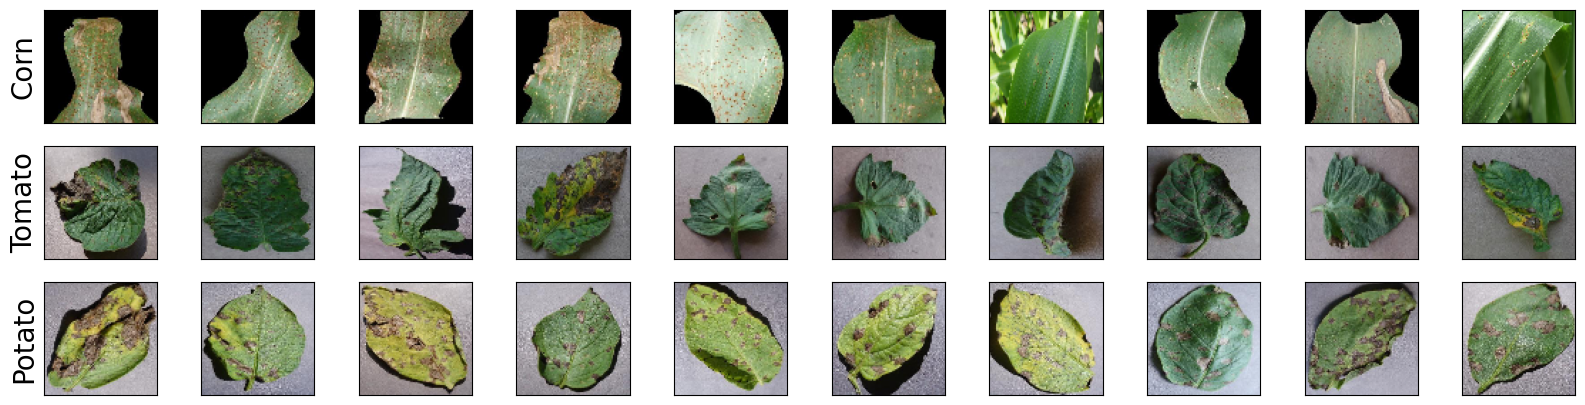

In [ ]:
i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(3,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (80,80))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

Process to prepare training data for a machine learning model

In [ ]:
train_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    train_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
print(len(train_data))

2606


Process to prepare testing data for a machine learning model

In [ ]:
test_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(test_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    test_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
print(len(test_data))

721


Process to prepare validation data for a machine learning model

In [ ]:
valid_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(validation_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    valid_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
print(len(valid_data))

500


In [ ]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)



Image Resizing

 Prepare the training data for a machine learning model

In [ ]:
from PIL import Image
X_train = []
Y_train = []

for img, label in train_data:
    # Make a copy of the image array before resizing
    img_copy = np.copy(img)
    img_resized = np.resize(img_copy, (100, 100, 3))  # Resize the image to your desired dimensions
    X_train.append(img_resized)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32')
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)



(2606, 100, 100, 3) (2606,)


Prepare the testing data for a machine learning model

In [ ]:
from PIL import Image
X_test = []
Y_test = []

for img, label in test_data:
    # Make a copy of the image array before resizing
    img_copy = np.copy(img)
    img_resized = np.resize(img_copy, (100, 100, 3))  # Resize the image to your desired dimensions
    X_test.append(img_resized)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32')
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)



(721, 100, 100, 3) (721,)


Prepare the validation data for a machine learning model

In [ ]:
from PIL import Image
X_valid = []
Y_valid = []

for img, label in valid_data:
    # Make a copy of the image array before resizing
    img_copy = np.copy(img)
    img_resized = np.resize(img_copy, (100, 100, 3))  # Resize the image to your desired dimensions
    X_valid.append(img_resized)
    Y_valid.append(label)

X_valid = np.array(X_valid).astype('float32')
Y_valid = np.array(Y_valid)
print(X_valid.shape, Y_valid.shape)

(500, 100, 100, 3) (500,)


Visualizing the mean image obtained from the X_train dataset.

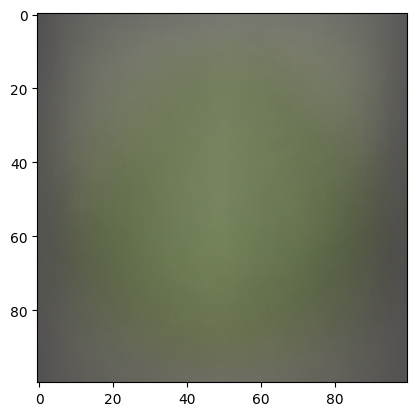

In [ ]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))
plt.show()


Demonstrates the process of saving data

In [ ]:
import os
import pickle


if not os.path.exists("Pickle data"):
    os.makedirs("Pickle data")
mean_img = ...

file_path = os.path.join("Pickle data", "mean_img.pkl")

pickle_out = open(file_path, 'wb')

pickle.dump(mean_img, pickle_out)

pickle_out.close()


Using the pickle module in Python to save various data objects into files.

In [ ]:
pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/X_train.pkl", 'wb')
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out= open("/content/drive/MyDrive/Machine Learning Final/Pickle/Y_train.pkl", 'wb')
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/X_valid.pkl", 'wb')
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/Y_valid.pkl", 'wb')
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/X_test.pkl", 'wb')
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/Y_test.pkl", 'wb')
pickle.dump(Y_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Machine Learning Final/Pickle/mean_img.pkl", 'wb')
pickle.dump(mean_img, pickle_out)
pickle_out.close()



In [ ]:
#/content/drive/MyDrive/Machine Learning Final/Model

In [ ]:
pickle_out = open( '/content/drive/MyDrive/Machine Learning Final/Pickle/X_train.pkl', 'rb')
X_train = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open( '/content/drive/MyDrive/Machine Learning Final/Pickle/Y_train.pkl', 'rb')
Y_train = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open( '/content/drive/MyDrive/Machine Learning Final/Pickle/X_valid.pkl', 'rb')
X_valid = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open( '/content/drive/MyDrive/Machine Learning Final/Pickle/Y_valid.pkl', 'rb')
Y_valid = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open( '/content/drive/MyDrive/Machine Learning Final/Pickle/X_test.pkl', 'rb')
X_test = pickle.load(pickle_out)
pickle_out.close()

pickle_out= open( '/content/drive/MyDrive/Machine Learning Final/Pickle/Y_test.pkl', 'rb')
Y_test = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open('/content/drive/MyDrive/Machine Learning Final/Pickle/mean_img.pkl', 'rb')
mean_img = pickle.load(pickle_out)
pickle_out.close()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(2606, 100, 100, 3)
(2606,)
(500, 100, 100, 3)
(500,)
(721, 100, 100, 3)
(721,)


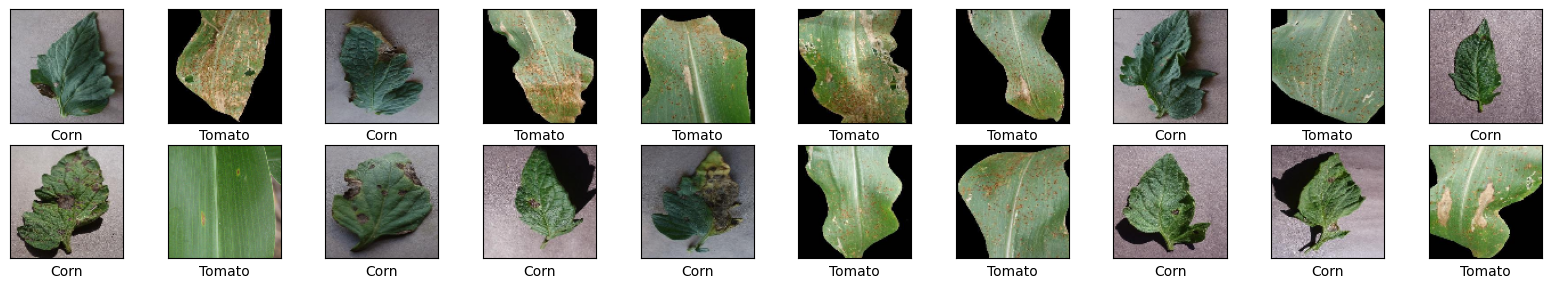

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(20):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'))

    if Y_train[i] == 0:
        plt.xlabel("Tomato")
    elif Y_train[i] == 1:
        plt.xlabel("Corn")
    else:
        plt.xlabel("Potato")

    plt.xticks([])
    plt.yticks([])
plt.show()


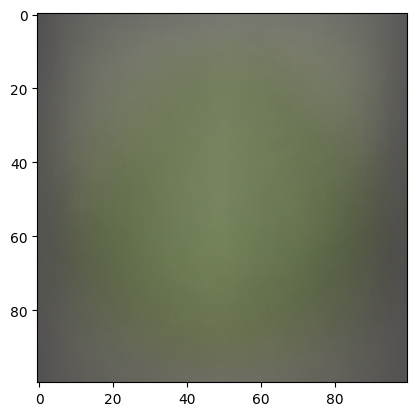

In [ ]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [ ]:
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=64, kernel_size=(11,11),strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(5,5),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 64)        23296     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 11, 11, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=128, validation_data=(X_valid, Y_valid))

Epoch 1/50
21/21 [==============================] - 5s 161ms/step - loss: -167.8526 - accuracy: 0.8830 - val_loss: -809.7964 - val_accuracy: 0.4780
Epoch 2/50
21/21 [==============================] - 1s 45ms/step - loss: -170.6743 - accuracy: 0.8584 - val_loss: -766.0942 - val_accuracy: 0.5160
Epoch 3/50
21/21 [==============================] - 1s 50ms/step - loss: -174.2634 - accuracy: 0.8784 - val_loss: -752.7460 - val_accuracy: 0.3900
Epoch 4/50
21/21 [==============================] - 1s 52ms/step - loss: -177.8592 - accuracy: 0.8653 - val_loss: -797.3925 - val_accuracy: 0.5200
Epoch 5/50
21/21 [==============================] - 1s 54ms/step - loss: -179.8168 - accuracy: 0.8461 - val_loss: -806.5488 - val_accuracy: 0.5200
Epoch 6/50
21/21 [==============================] - 1s 55ms/step - loss: -182.3523 - accuracy: 0.8668 - val_loss: -824.1065 - val_accuracy: 0.5200
Epoch 7/50
21/21 [==============================] - 1s 51ms/step - loss: -186.5543 - accuracy: 0.8607 - val_loss: -83

In [ ]:
model.save("/content/drive/MyDrive/Machine Learning Final/Model/plant disease model.h5")

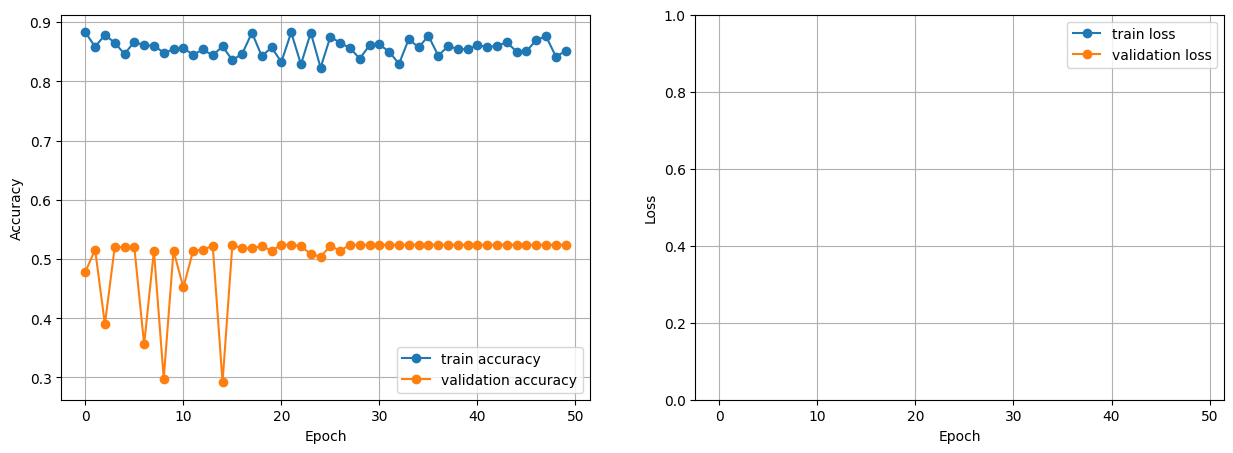

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

23/23 [==============================] - 0s 15ms/step - loss: -191.1964 - accuracy: 0.5714

Test Accuracy: 0.5714285969734192

Test Loss: -191.1963653564453


In [ ]:
model.evaluate(X_test, Y_test)

23/23 [==============================] - 0s 9ms/step - loss: -191.1964 - accuracy: 0.5714


[-191.1963653564453, 0.5714285969734192]